In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import FinanceDataReader as fdr

In [4]:
plt.rc("font", family="Malgun Gothic")

In [9]:
#005930
samsung = fdr.DataReader("005930")

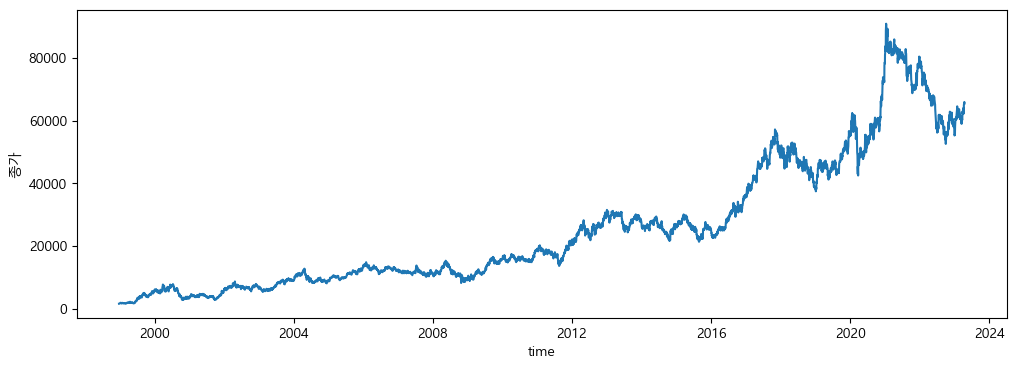

In [15]:
plt.figure(figsize=(12,4))
sns.lineplot(x=samsung.index, y="Close", data=samsung)
plt.xlabel("time")
plt.ylabel("종가")
plt.show()

In [18]:
def show_ts(df):
    plt.figure(figsize=(12,4))
    sns.lineplot(x=df.index, y="Close", data=df)
    plt.xlabel("time")
    plt.ylabel("종가")
    plt.show()

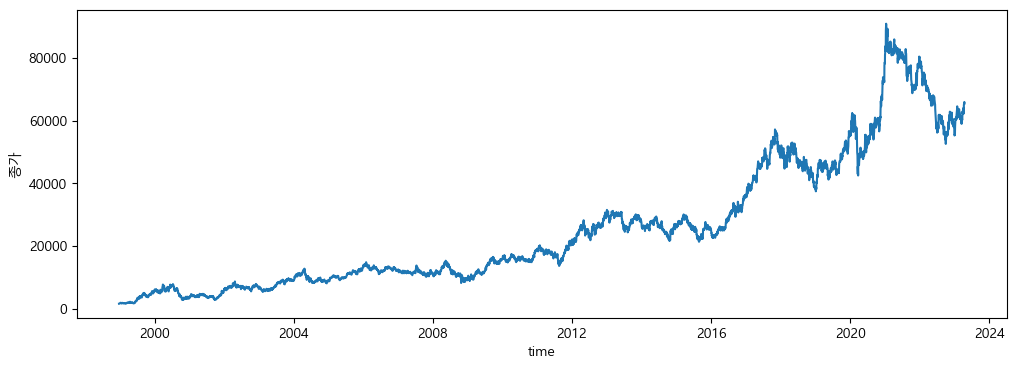

In [25]:
show_ts(samsung)

In [26]:
time_steps = [["1990","2000"],
                ["2000","2010"],
                ["2010","2015"],
                ["2015","2020"],
                ["2020","2022"]]


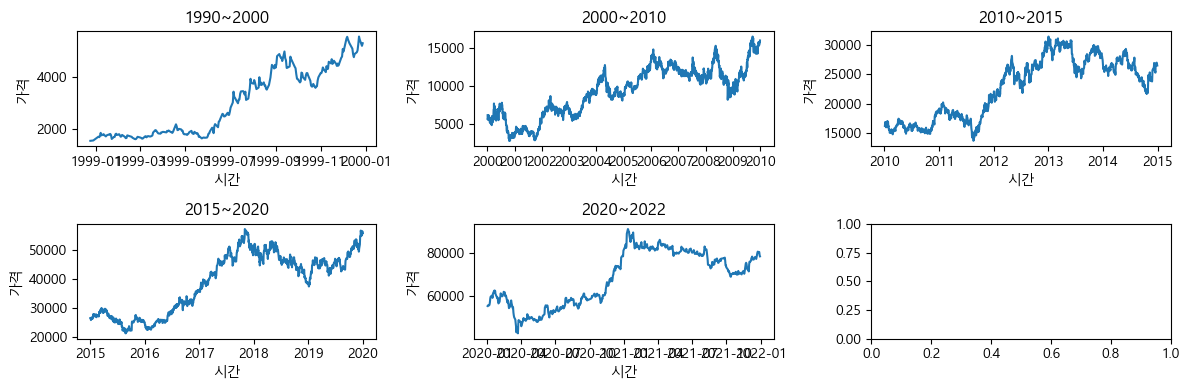

In [30]:
fig, axes = plt.subplots(2,3)
fig.set_size_inches(12,4)
for i in range(5):
    ax = axes[i//3, i%3]
    df = samsung.loc[(samsung.index > time_steps[i][0]) & (samsung.index < time_steps[i][1])]
    # subplot 쓸 때는 축 ax = ax 들어와야 함 그리고 데이터를 와이축에 붙임
    sns.lineplot(x=df.index, y=df["Close"], ax=ax)
    ax.set_title(f"{time_steps[i][0]}~{time_steps[i][1]}")
    ax.set_xlabel("시간")
    ax.set_ylabel("가격")
plt.tight_layout()
plt.show()
    # index => date

In [31]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [ ]:
y 컬럼과 ds(시간) 컬럼이 존재해야 함

In [35]:
stock = fdr.DataReader("005930", "2022")
stock["y"] = stock["Close"]
stock["ds"] = stock.index
stock.head()


,Open,High,Low,Close,Volume,Change,y,ds
Date,,,,,,,,
2022-01-03,79400,79800,78200,78600,13502112,0.003831,78600,2022-01-03
2022-01-04,78800,79200,78300,78700,12427416,0.001272,78700,2022-01-04
2022-01-05,78800,79000,76400,77400,25470640,-0.016518,77400,2022-01-05
2022-01-06,76700,77600,76600,76900,12931954,-0.006460,76900,2022-01-06
2022-01-07,78100,78400,77400,78300,15163757,0.018205,78300,2022-01-07


In [36]:
# raw 데이터를 fit
m = Prophet()
m.fit(stock)

16:21:53 - cmdstanpy - INFO - Chain [1] start processing
16:21:53 - cmdstanpy - INFO - Chain [1] done processing


In [39]:
# 예측을 원하는 기간 설정
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
342,2023-05-09
343,2023-05-10
344,2023-05-11
345,2023-05-12
346,2023-05-13


In [40]:
# 예측
forecast = m.predict(future)
forecast.tail()
# yhat(예측값)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
342,2023-05-09,64072.079937,61604.629076,66160.429623,63923.424486,64249.496547,-170.170033,-170.170033,-170.170033,-170.170033,-170.170033,-170.170033,0.0,0.0,0.0,63901.909904
343,2023-05-10,64100.308690,61586.423497,66268.767371,63940.691668,64288.928239,-167.939246,-167.939246,-167.939246,-167.939246,-167.939246,-167.939246,0.0,0.0,0.0,63932.369444
344,2023-05-11,64128.537443,61522.434746,66222.093322,63958.366992,64325.606200,-217.837661,-217.837661,-217.837661,-217.837661,-217.837661,-217.837661,0.0,0.0,0.0,63910.699782
345,2023-05-12,64156.766196,61576.425530,66631.633945,63976.572726,64361.523797,-19.527359,-19.527359,-19.527359,-19.527359,-19.527359,-19.527359,0.0,0.0,0.0,64137.238837
346,2023-05-13,64184.994949,62127.887709,67021.947621,63994.032819,64401.092944,349.894022,349.894022,349.894022,349.894022,349.894022,349.894022,0.0,0.0,0.0,64534.888971


In [43]:
# 예측결과 상 하한
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].iloc[-40:-20]

,ds,yhat,yhat_lower,yhat_upper
307,2023-03-31,62951.631210,60561.647207,65303.798920
308,2023-04-03,62931.531191,60406.335393,65301.478327
309,2023-04-04,62913.903549,60640.301795,65323.219313
310,2023-04-05,62944.363088,60465.191705,65183.261645
311,2023-04-06,62922.693426,60638.969568,65408.473477
312,2023-04-07,63149.232481,60717.794889,65515.707889
313,2023-04-10,63129.132462,60871.747004,65574.709876
314,2023-04-11,63111.504820,60779.072213,65583.340364
315,2023-04-12,63141.964359,60866.352448,65503.878116
316,2023-04-13,63120.294698,60737.961996,65440.461045


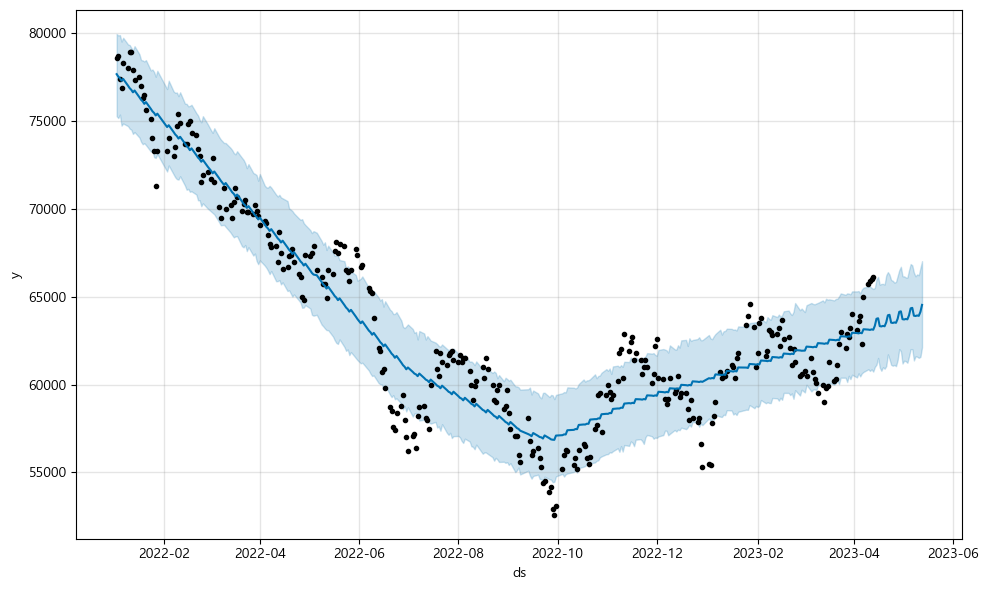

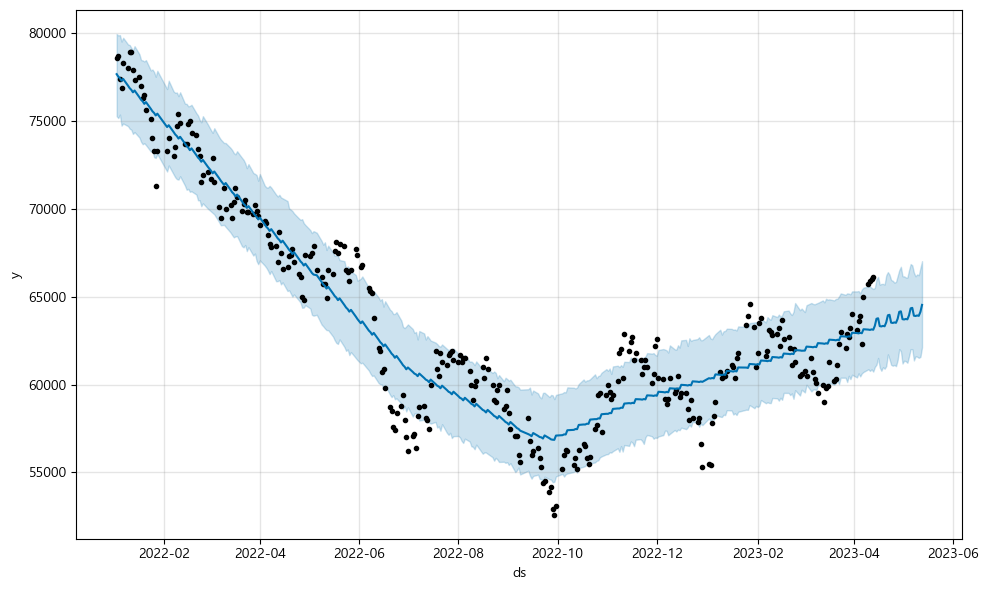

In [44]:
# 전체 데이터 확인
m.plot(forecast)

In [46]:
# 이왕이면 plotly 사용
fig = plot_plotly(m, forecast)
fig

In [48]:
# 세부 컴포넌트를 이용해서 확인
plot_components_plotly(m, forecast)

In [50]:
from prophet.plot import add_changepoints_to_plot


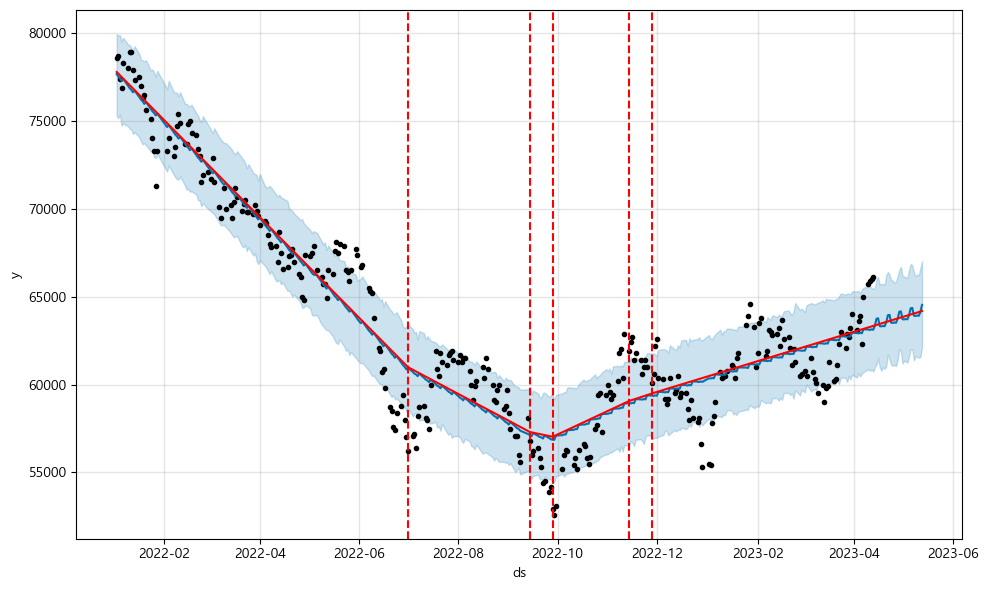

In [52]:
# 변경점 확인(gca는 알고리즘)
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)


16:56:53 - cmdstanpy - INFO - Chain [1] start processing
16:56:53 - cmdstanpy - INFO - Chain [1] done processing


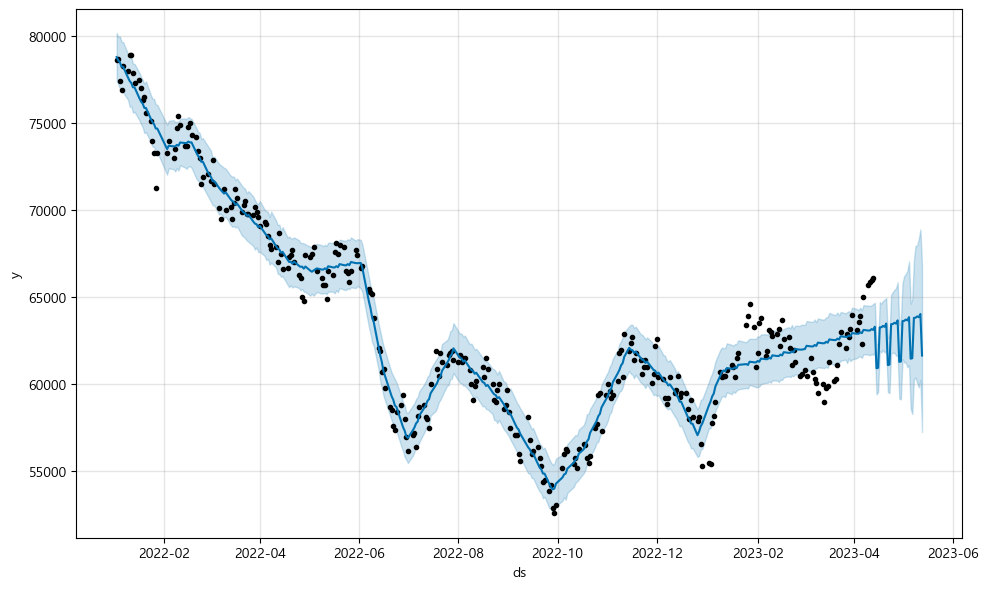

In [54]:
# 유연성 => 계수가 낮으면 과소적합, 높으면 과대적합 ==> 하이퍼
m = Prophet(changepoint_prior_scale = 0.6)
forecast = m.fit(stock).predict(future)
fig = m.plot(forecast)

In [ ]:
# 서울시에서 코로나 확진자 발표

In [21]:
btc = fdr.DataReader("BTC/KRW", "2022")

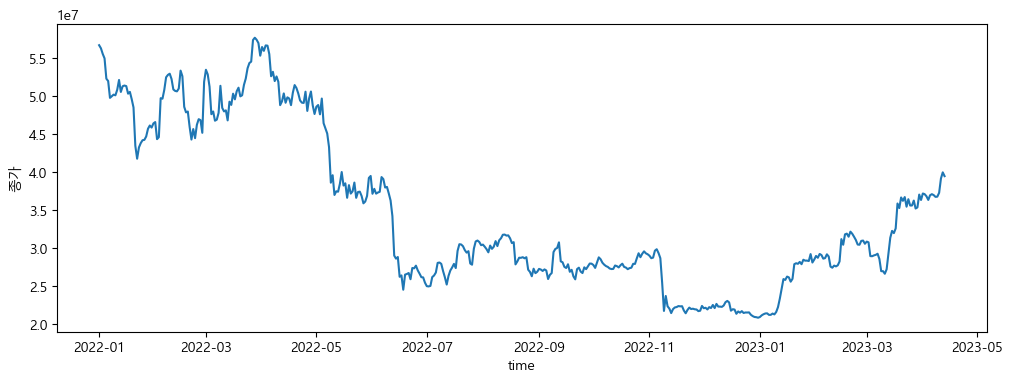

In [22]:
show_ts(btc)